## Supervised_Capstone_Project

In [94]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

data1 = pd.read_csv('bank-additional-full.csv', sep = ';')
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Input variables and target column

#### bank client data:
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Objective: 
* find out if a client will subscribed the term deposit service or not base on their information

## Methods:
* Algrithms: Knn, random forest, gradient boost, SVM, DecisionTree and logistic regression 
* Dimension reduction: PCA
* Prediction measurement: Cross_validation_score, accuracy_score, and confusion matrix

## Working on the target column

In [95]:
print(data1['y'].value_counts())
df1 = data1[data1['y']=='yes']
df2 = data1[data1['y']=='no'].sample(n=4640)
data = pd.concat([df1, df2])
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64


yes    4640
no     4640
Name: y, dtype: int64

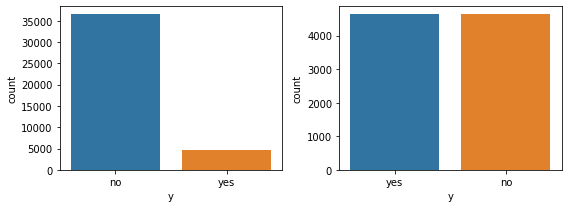

In [96]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.countplot(data1['y'])

plt.subplot(1,2,2)
sns.countplot(data['y'])

plt.tight_layout()

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9280 entries, 75 to 16019
Data columns (total 21 columns):
age               9280 non-null int64
job               9280 non-null object
marital           9280 non-null object
education         9280 non-null object
default           9280 non-null object
housing           9280 non-null object
loan              9280 non-null object
contact           9280 non-null object
month             9280 non-null object
day_of_week       9280 non-null object
duration          9280 non-null int64
campaign          9280 non-null int64
pdays             9280 non-null int64
previous          9280 non-null int64
poutcome          9280 non-null object
emp.var.rate      9280 non-null float64
cons.price.idx    9280 non-null float64
cons.conf.idx     9280 non-null float64
euribor3m         9280 non-null float64
nr.employed       9280 non-null float64
y                 9280 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 1.9+ MB


## Study both numerical and categorical data 

In [59]:
df_numeric = data.select_dtypes(include = ['float', 'int64'])
df_object = data.select_dtypes(include = 'object')

## Investigate and select variables for further analysis

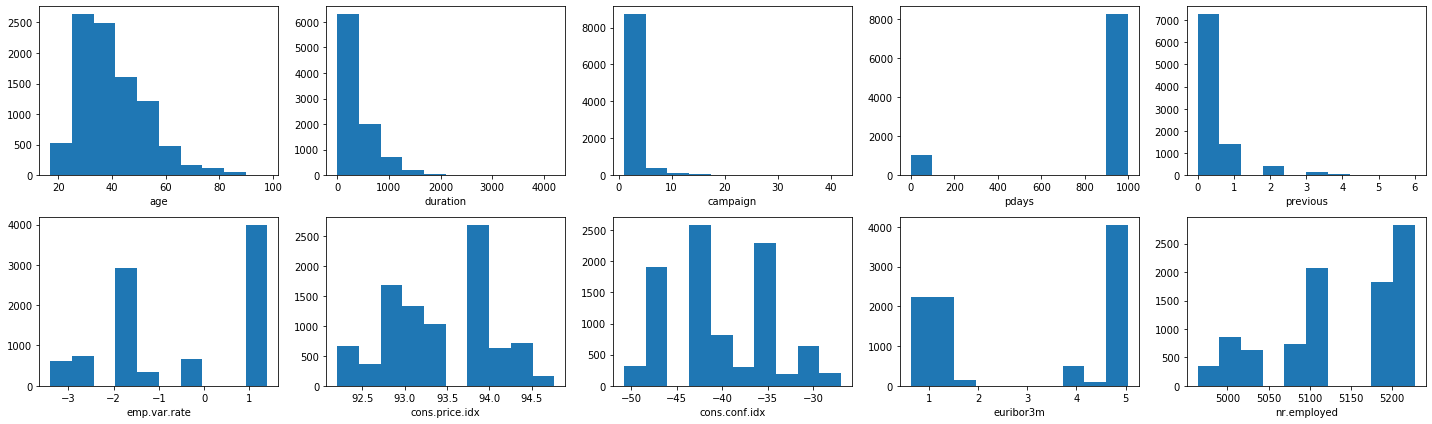

In [60]:
plt.figure(figsize=(20,6))
for i in range(0, len(df_numeric.columns)):
    plt.subplot(2,5,i+1)
    plt.hist(df_numeric[df_numeric.columns[i]])
    plt.xlabel(df_numeric.columns[i])
plt.tight_layout()

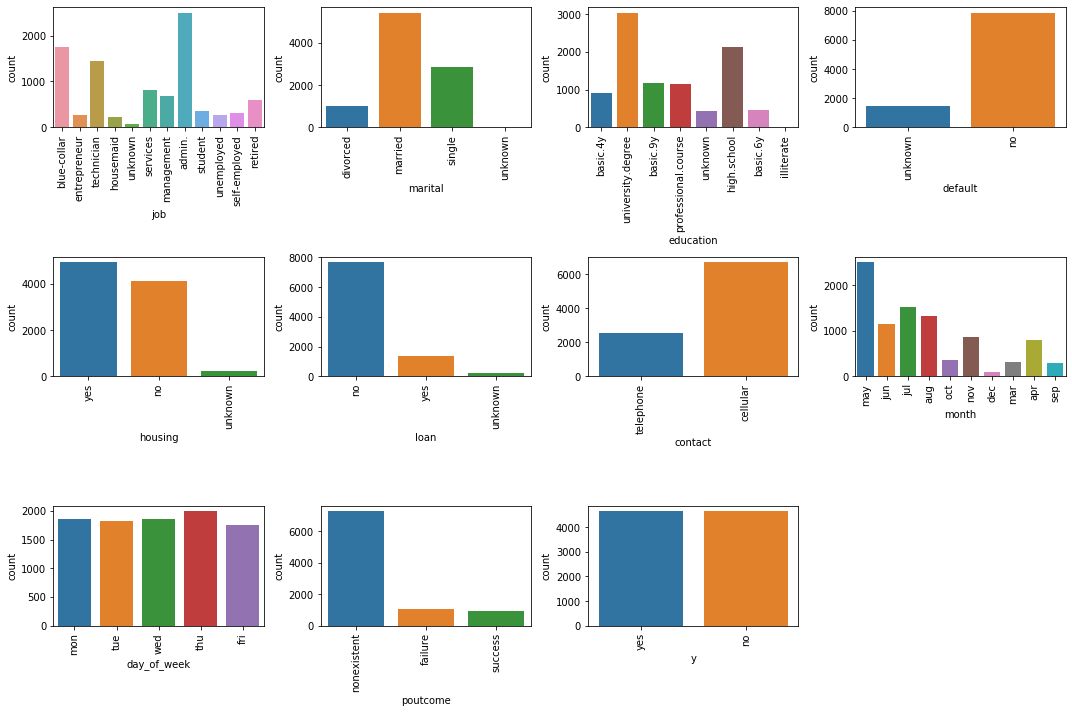

In [61]:
plt.figure(figsize=(15,10))

for i in range(0, len(df_object.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(df_object[df_object.columns[i]])
    plt.xticks(rotation = 90)
plt.tight_layout()

* day_of_week did not show clear variation, therefore need to be removed

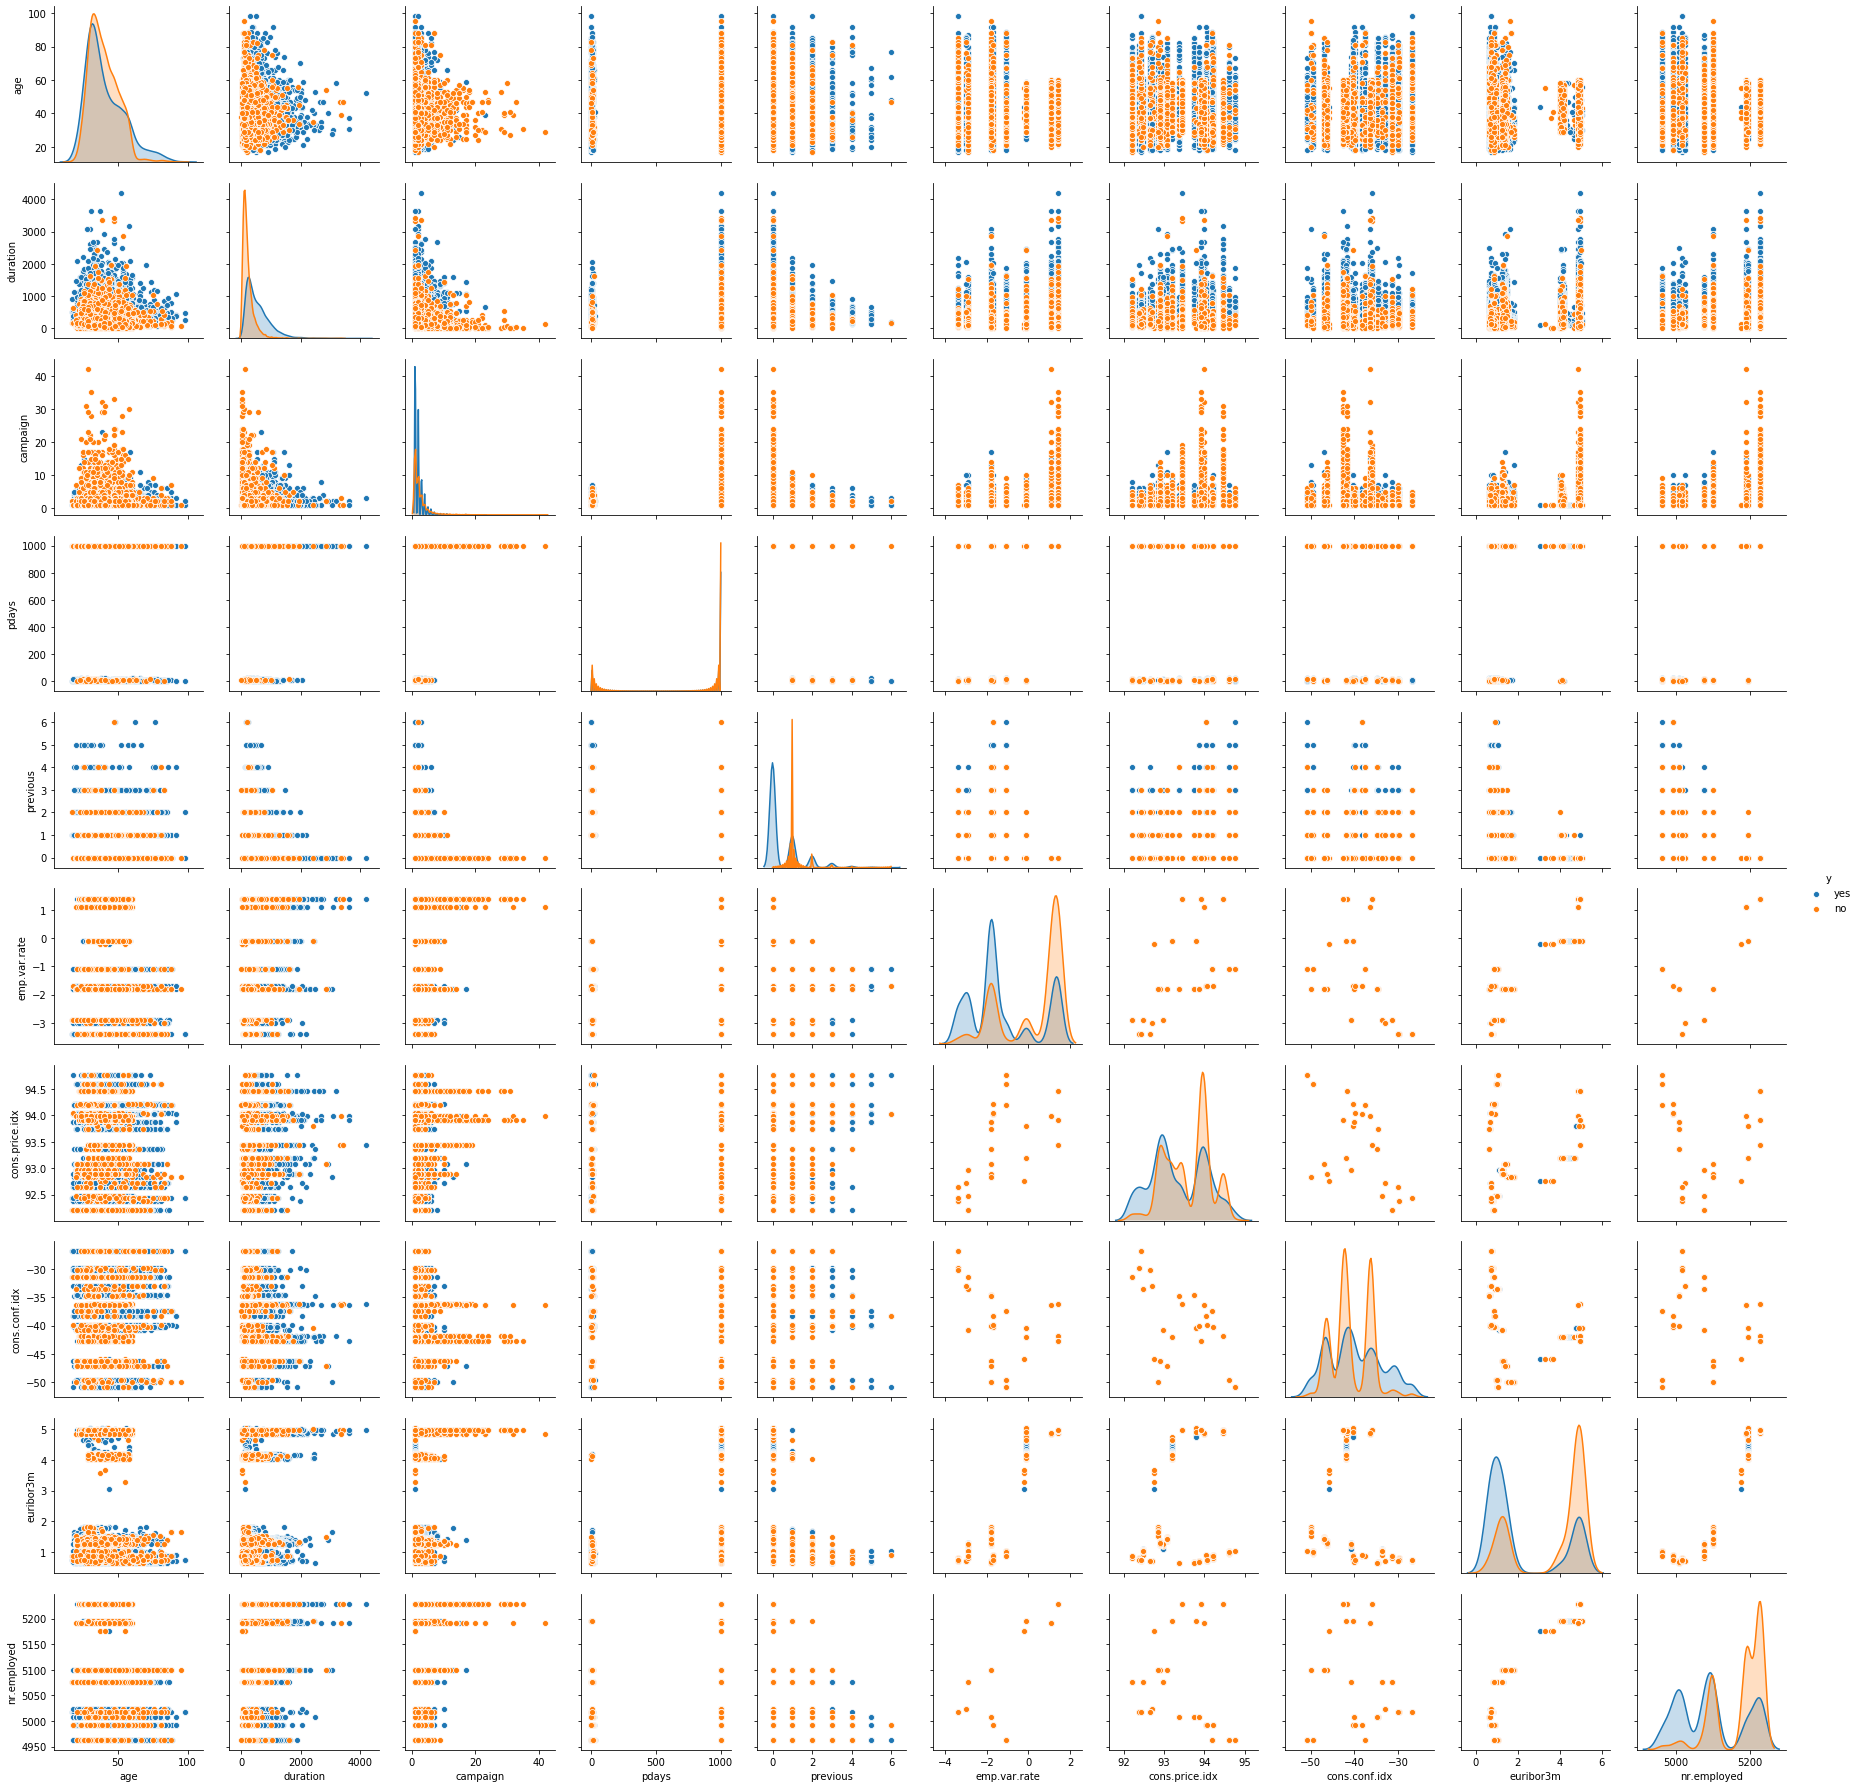

In [62]:
g = sns.pairplot(data, hue='y')

* No clear correlations were detected between two numerical variabe, so all the numerical variable need to be future studied

## Prepare the features and target - convert object to dummies 

In [63]:
df_object.drop(columns = ['day_of_week'], inplace=True)
df_object_dummy = pd.get_dummies(df_object, drop_first=True)

df_object_dummy_feature = df_object_dummy.drop(columns=['y_yes'])

features = pd.concat([df_numeric, df_object_dummy_feature], axis=1)
target = df_object_dummy['y_yes']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Model comparison - Knn, random forest, gradient boost, SVM, DecisionTree and logistic regression 

In [64]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=456)

## Knn

In [65]:
from sklearn.neighbors import KNeighborsClassifier
for k in [1,5,10,15,20]:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, x_train, y_train, cv=10)
    print(k, score.mean(), score.std())

1 0.8135791907556447 0.011711432238485435
5 0.855609258159375 0.012894364963469322
10 0.8620720971078695 0.01208480933170626
15 0.865035972268387 0.01506167191846504
20 0.8659777355180059 0.015016578173038685


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# seems when k value is 20, the model got the most accuracy, however the increase is negligible. So either 15 or 20 should be ok
# for this model

knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
average_score_knn = cross_val_score(knn, x_train, y_train, cv=10).mean()
average_score_std = cross_val_score(knn, x_train, y_train, cv=10).std()
print(average_score_knn, average_score_std)

knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.865035972268387 0.01506167191846504
test data prediction accuracy, 0.8658405172413793
[[800 143]
 [106 807]]


## Random forest

In [67]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
average_score_rfc = cross_val_score(rfc, x_train, y_train, cv=10).mean()
std_score_rfc = cross_val_score(rfc, x_train, y_train, cv=10).std()
print(average_score_rfc, std_score_rfc)

rfc.fit(x_train, y_train)
prediction = rfc.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.8698819208700911 0.004672558251721198
test data prediction accuracy, 0.8825431034482759
[[827 116]
 [102 811]]


## Logistic regression

In [68]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
average_score_lg = cross_val_score(lg, x_train, y_train, cv=10).mean()
std_score_lg = cross_val_score(lg, x_train, y_train, cv=10).std()
print(average_score_lg, std_score_lg)

lg.fit(x_train, y_train)
prediction=lg.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.865304788007912 0.011097070367091904
test data prediction accuracy, 0.8793103448275862
[[818 125]
 [ 99 814]]


## Gradient boosting

In [69]:
from sklearn import ensemble

gbc = ensemble.GradientBoostingClassifier()
average_score_gbc = cross_val_score(gbc, x_train, y_train, cv=10).mean()
std_score_gbc = cross_val_score(gbc, x_train, y_train, cv=10).std()
print(average_score_gbc, std_score_gbc)

gbc.fit(x_train, y_train)
prediction=gbc.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.882274689726698 0.00817837543083763
test data prediction accuracy, 0.8793103448275862
[[803 140]
 [ 84 829]]


## DecisionTree

In [70]:
from sklearn.tree import DecisionTreeClassifier

dtc =  DecisionTreeClassifier()
average_score_dtc = cross_val_score(dtc, x_train, y_train, cv=10).mean()
std_score_dtc = cross_val_score(dtc, x_train, y_train, cv=10).std()
print(average_score_dtc, std_score_dtc)

dtc.fit(x_train, y_train)
prediction= dtc.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.8271799957498052 0.013319936455211014
test data prediction accuracy, 0.8421336206896551
[[803 140]
 [153 760]]


## Support vector machine

In [71]:
from sklearn.svm import SVC

svc= SVC(kernel = 'sigmoid')
average_score_svc = cross_val_score(svc, x_train, y_train, cv=10).mean()
std_score_svc = cross_val_score(svc, x_train, y_train, cv=10).std()
print(average_score_svc, std_score_svc)

svc.fit(x_train, y_train)
prediction= svc.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.5020204772205905 2.497030691279713e-06
test data prediction accuracy, 0.49191810344827586
[[  0 943]
 [  0 913]]


## Apply the PCA to reduce number of features

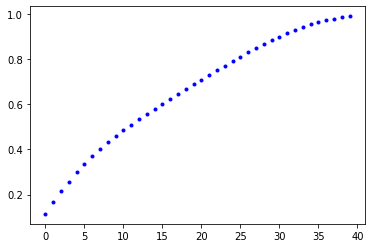

In [100]:
X = features
Y = target
X = StandardScaler().fit_transform(X)
sklearn_pca = PCA(n_components=40)
result = sklearn_pca.fit_transform(X)
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_), 'b.');

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = features
Y = target
X = StandardScaler().fit_transform(X)
sklearn_pca = PCA(n_components=26)
pca_ = sklearn_pca.fit_transform(X)
print(sklearn_pca.explained_variance_ratio_.sum())
print(pca_)

0.8095530107964449
[[-2.55952188e+00  5.64757600e-01  1.07566438e+00 ... -6.49946656e-01
   1.59299682e+00 -1.08215790e+00]
 [-2.35983246e+00  1.49230269e+00 -1.86307791e-01 ... -2.83722046e+00
   6.76284477e-01 -7.55037873e-01]
 [-2.23904624e+00  1.15117343e+00  5.58051534e-01 ... -6.59264161e-01
   1.72627137e+00 -4.06736875e-01]
 ...
 [-1.86613272e+00 -1.00020018e+00 -1.57715068e-03 ...  4.41226845e-02
   1.75285535e-01 -2.16384427e-01]
 [ 6.42269777e-01  8.17827316e-01 -1.60048284e+00 ... -3.11264308e-01
   1.30411172e+00 -6.86293445e-02]
 [-1.94262983e+00 -2.07301748e-01 -5.53062165e-01 ...  4.24275236e-01
  -3.24419840e-01  1.42707670e+00]]


In [74]:
x_train, x_test, y_train, y_test = train_test_split(pca_, Y, test_size=0.2, random_state=456)

## Model comparison accuracy using different algorithms

## Knn

In [75]:
knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
average_score_knn = cross_val_score(knn, x_train, y_train, cv=10).mean()
average_score_std = cross_val_score(knn, x_train, y_train, cv=10).std()
print(average_score_knn, average_score_std)

knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.8041499337950425 0.011497403431743443
test data prediction accuracy, 0.8232758620689655
[[812 131]
 [197 716]]


## Random forest

In [76]:
rfc = RandomForestClassifier()
average_score_rfc = cross_val_score(rfc, x_train, y_train, cv=10).mean()
std_score_rfc = cross_val_score(rfc, x_train, y_train, cv=10).std()
print(average_score_rfc, std_score_rfc)

rfc.fit(x_train, y_train)
prediction = rfc.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.8212573311319502 0.00980755956431842
test data prediction accuracy, 0.8512931034482759
[[805 138]
 [138 775]]


## Logistic regression

In [77]:
lg = LogisticRegression()
average_score_lg = cross_val_score(lg, x_train, y_train, cv=10).mean()
std_score_lg = cross_val_score(lg, x_train, y_train, cv=10).std()
print(average_score_lg, std_score_lg)

lg.fit(x_train, y_train)
prediction=lg.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.83162435543253 0.011722666257498756
test data prediction accuracy, 0.8453663793103449
[[793 150]
 [137 776]]


## Gradient boosting

In [78]:
gbc = ensemble.GradientBoostingClassifier()
average_score_gbc = cross_val_score(gbc, x_train, y_train, cv=10).mean()
std_score_gbc = cross_val_score(gbc, x_train, y_train, cv=10).std()
print(average_score_gbc, std_score_gbc)

gbc.fit(x_train, y_train)
prediction=gbc.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.8484658431460159 0.00869642846793109
test data prediction accuracy, 0.8615301724137931
[[806 137]
 [120 793]]


## DecisionTree

In [79]:
dtc =  DecisionTreeClassifier()
average_score_dtc = cross_val_score(dtc, x_train, y_train, cv=10).mean()
std_score_dtc = cross_val_score(dtc, x_train, y_train, cv=10).std()
print(average_score_dtc, std_score_dtc)

dtc.fit(x_train, y_train)
prediction= dtc.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.7708917962158737 0.013166051635374014
test data prediction accuracy, 0.78125
[[732 211]
 [195 718]]


## Support vector machine

In [80]:
svc= SVC(kernel = 'sigmoid')
average_score_svc = cross_val_score(svc, x_train, y_train, cv=10).mean()
std_score_svc = cross_val_score(svc, x_train, y_train, cv=10).std()
print(average_score_svc, std_score_svc)

svc.fit(x_train, y_train)
prediction= svc.predict(x_test)
print('test data prediction accuracy, {}'.format(accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test, prediction))

0.726030990095593 0.010793641335085421
test data prediction accuracy, 0.7273706896551724
[[672 271]
 [235 678]]


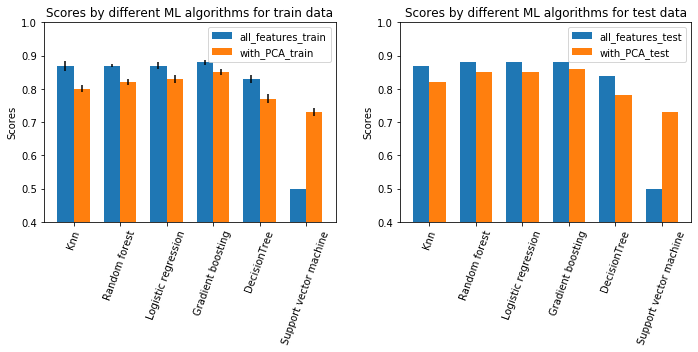

In [102]:
labels = ['Knn', 'Random forest', 'Logistic regression', 'Gradient boosting', 'DecisionTree', 'Support vector machine']
all_features = [0.87,0.87,0.87,0.88,0.83,0.5]
with_PCA = [0.8,0.82,0.83,0.85,0.77,0.73]
all_features_errors = [0.015,0.005,0.011,0.008,0.013,0]
with_PCA_errors = [0.011,0.009,0.012,0.009,0.013,0.011]

all_features_test = [0.87,0.88,0.88,0.88,0.84,0.5]
with_PCA_test = [0.82,0.85,0.85,0.86,0.78,0.73]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1, 2,  figsize=(10, 5))

ax[0].bar(x - width/2, all_features, width, yerr = all_features_errors, label='all_features_train')
ax[0].bar(x + width/2, with_PCA, width, yerr = with_PCA_errors , label='with_PCA_train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Scores')
ax[0].set_title('Scores by different ML algorithms for train data')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels, rotation=70)
ax[0].set_ylim(0.4, 1)
ax[0].legend()

ax[1].bar(x - width/2, all_features_test, width, label='all_features_test')
ax[1].bar(x + width/2, with_PCA_test, width, label='with_PCA_test')

ax[1].set_ylabel('Scores')
ax[1].set_title('Scores by different ML algorithms for test data')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels, rotation=70)
ax[1].set_ylim(0.4, 1)
ax[1].legend()

plt.tight_layout();

* For the train set: 
    * Gradient boosting showed the highest prediction accuracy
    * Knn, random forest, and Lofistic regression also showed decent prediction accuracy
    * Decision tree and support vector showed weak prediction performance
    
* For the test set:
    * Similar performance were seen for the test set to the train set
    * Random forest, logistic regression, and gradient boosting showed the best prediction accuracy
    
* Overall, with and without applying PCA showed well agreement
* The prediction are consistent as using the cross_validation methods which indicate no overfitting

## Confusion matrix interpretation

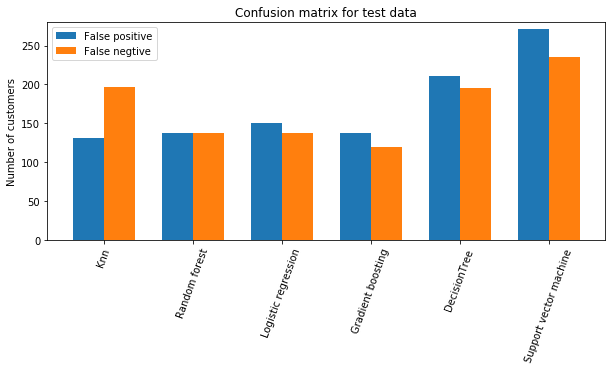

In [101]:
FP = [131,138,150,137,211,271]
FN = [197,138,137,120,195,235]

labels = ['Knn', 'Random forest', 'Logistic regression', 'Gradient boosting', 'DecisionTree', 'Support vector machine']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1, 1,  figsize=(10, 4))
g1 = ax.bar(x - width/2, FP, width, label='False positive')
g2 = ax.bar(x + width/2, FN, width, label='False negtive')

ax.set_ylabel('Number of customers')
ax.set_title('Confusion matrix for test data')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70)
ax.set_ylim(0, 280)
ax.legend();

* False positive: the custom not subscribe, but the prediction is subscribed. The False positive is very detrimental for imporving the business, cuase it will not calling those who already subscibed the servise, so we will lose the potential customers. 
* The False negtive is ok, even we calling those customers who already subscribed will not make them cancel the subscribtion. 

## Conclusion:
* Overall, gradient boosting is the best for both train and test accuracy and consistency. due to the low performance, support vector and decision tree are not suggested. Knn, random forest and logistic regression perform fairly good. There is no significant overfitting problem was found.
* From the explainatory aspect, we should choose KNN.
* There are 26 premary components were used and only represent 80% of the total variance, so a better feature selection may needed. 
* For the data exploration, a box plot may needed for removing some potential outliers which will lead an overfit or inaccurate prediction.
* Also, for all the models, it will be worth to pass different functions to tune algorithms. 